# 最終的なモデル詰め合わせ

In [159]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# kNN
from sklearn.neighbors import KNeighborsClassifier

# NeuralNet, CNN
from torchvision import transforms
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
torch.manual_seed(0)

# LightGBM
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# 画像読み込み
from pathlib import Path
import cv2

# 転移学習
from torchvision import models

In [185]:
# Path
dbPath = "../input/Dlib/cutface/default/DB/csv/features_rel_dist.csv"
queryPath = "../input/Dlib/cutface/default/Query/csv/features_rel_dist.csv"

In [186]:
# read data
db_df = pd.read_csv(dbPath, index_col=0)
query_df = pd.read_csv(queryPath, index_col=0)

In [162]:
db_df.head()

,target,face_height,chin_width,chin_height,right_Eyebrow_width,right_Eyebrow_height,left_Eyebrow_width,left_Eyebrow_height,nose_width,nose_height,...,left_Eye_width,left_Eye_height,mouse_width,mouse_height,eye2eye_dist,Reye2nose_dist,Leye2nose_dist,nose2mouse_dist,Reye2mouse_dist,Leye2mouse_dist
0,1,1.006897,1.0,0.813793,0.379310,0.075862,0.358621,0.034483,0.193103,0.337931,...,0.172414,0.034483,0.365517,0.137931,0.481659,0.316339,0.300362,0.307769,0.560535,0.550034
1,1,1.007092,1.0,0.808511,0.390071,0.085106,0.382979,0.035461,0.198582,0.340426,...,0.177305,0.049645,0.347518,0.148936,0.477594,0.310900,0.311195,0.327790,0.576771,0.580555
2,1,1.043478,1.0,0.652174,0.347826,0.144928,0.355072,0.050725,0.195652,0.282609,...,0.173913,0.036232,0.376812,0.173913,0.456559,0.249496,0.247213,0.337721,0.496690,0.486733
3,1,1.042553,1.0,0.751773,0.375887,0.106383,0.368794,0.035461,0.191489,0.304965,...,0.163121,0.035461,0.368794,0.156028,0.457878,0.275893,0.257903,0.334224,0.534341,0.513998
4,1,1.020548,1.0,0.787671,0.376712,0.095890,0.369863,0.041096,0.191781,0.321918,...,0.171233,0.027397,0.349315,0.157534,0.454346,0.288298,0.273767,0.331534,0.552807,0.540160


In [163]:
query_df.head()

,target,face_height,chin_width,chin_height,right_Eyebrow_width,right_Eyebrow_height,left_Eyebrow_width,left_Eyebrow_height,nose_width,nose_height,...,left_Eye_width,left_Eye_height,mouse_width,mouse_height,eye2eye_dist,Reye2nose_dist,Leye2nose_dist,nose2mouse_dist,Reye2mouse_dist,Leye2mouse_dist
0,1,1.062893,1.0,0.767296,0.364780,0.132075,0.396226,0.037736,0.213836,0.308176,...,0.188679,0.056604,0.421384,0.201258,0.487480,0.275855,0.303810,0.340966,0.552178,0.555459
1,1,1.040000,1.0,0.840000,0.376000,0.112000,0.392000,0.056000,0.208000,0.360000,...,0.200000,0.056000,0.384000,0.120000,0.492065,0.314197,0.321672,0.307005,0.561308,0.568277
2,1,1.030303,1.0,0.848485,0.363636,0.078788,0.369697,0.036364,0.206061,0.369697,...,0.206061,0.072727,0.357576,0.139394,0.516440,0.354276,0.357502,0.324081,0.622631,0.627051
3,1,1.061350,1.0,0.815951,0.355828,0.098160,0.374233,0.042945,0.202454,0.361963,...,0.196319,0.061350,0.368098,0.171779,0.502118,0.322616,0.342465,0.334214,0.602352,0.610787
4,1,1.006711,1.0,0.865772,0.362416,0.060403,0.362416,0.040268,0.194631,0.369128,...,0.194631,0.073826,0.328859,0.120805,0.503743,0.355903,0.355602,0.292058,0.600449,0.597211


In [164]:
db_feature_df = db_df.drop(["target"], axis=1).copy()
db_target_df = db_df["target"].copy()
query_featture_df =query_df.drop(["target"], axis=1).copy()
query_target_df = query_df["target"].copy()

In [165]:
def calc_accu(query_target_df, pred):
    correct_num = (prediction_df["target"] == prediction_df["predict"]).sum()
    accuracy = correct_num / prediction_df.shape[0]
    return correct_num, accuracy

# テーブルデータ
## 単純マッチング

In [166]:
result = []
prediction_df = pd.DataFrame(query_target_df)
for i in range(query_featture_df.shape[0]):
    minimum_id = (db_feature_df - query_featture_df.iloc[i]).abs().sum(axis=1).idxmin()
    prediction_df.loc[i, "predict"] = db_target_df[minimum_id]

In [167]:
prediction_df.head()

,target,predict
0,1,1.0
1,1,5.0
2,1,10.0
3,1,9.0
4,1,19.0


In [168]:
correct_num = (prediction_df["target"] == prediction_df["predict"]).sum()
accuracy = correct_num / prediction_df.shape[0]

In [169]:
accuracy

0.5344827586206896

## kNN

In [170]:
DIV_NUM = 3 # k
DIST_SETTING = 2 # ユークリッド=2, マンハッタン=1

In [171]:
knn = KNeighborsClassifier(n_neighbors=DIV_NUM, p=DIST_SETTING, metric="minkowski")
knn.fit(db_feature_df.values, db_target_df.values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [172]:
prediction = knn.predict(query_featture_df.values)
prediction_df = pd.DataFrame(query_target_df)
prediction_df["predict"] = prediction

In [173]:
correct_num = (prediction_df["target"] == prediction_df["predict"]).sum()
accuracy = correct_num / prediction_df.shape[0]

In [174]:
accuracy

0.5172413793103449

## NeuralNet

In [196]:
input_size = db_feature_df.shape[1]
# define network
net = nn.Sequential(
        nn.Linear(input_size, 1024),
        nn.ReLU(),
        nn.Linear(1024, 1024),
        nn.ReLU(),
        nn.Linear(1024, 1024),
        nn.ReLU(),
        nn.Linear(1024, 1024),
        nn.ReLU(),
        nn.Linear(1024, 20)
)

In [197]:
X_train = torch.tensor(db_feature_df.values, dtype=torch.float32)
y_train = torch.tensor(db_target_df.values, dtype=torch.int64)

X_test = torch.tensor(query_featture_df.values, dtype=torch.float32)
y_test = torch.tensor(query_target_df.values, dtype=torch.int64)

In [198]:
X_train.shape

torch.Size([200, 21])

In [199]:
X_test.shape

torch.Size([58, 21])

In [200]:
# 損失関数
loss_fn = nn.CrossEntropyLoss()
# adam
optimizer = optim.Adam(net.parameters())
# 損失ログ
losses_train = []
accuracy_test = []
accuracy_train = []
EPOCH = 200

In [201]:
# 20エポック回す
# ここだけ繰り返すと再学習しちゃうので注意
for epoc in range(EPOCH):
    optimizer.zero_grad()
    
    y_pred = net(X_train)
    
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    
    optimizer.step()
    
    losses_train.append(loss.item())
    
    _, predicted = torch.max(y_pred, 1)
    corrects_train = 0
    for i in range(len(predicted)):
        if(predicted[i]==y_train[i]):
            corrects_train += 1
    accuracy_train.append(corrects_train/len(y_train))
    
    y_test_pred = net(X_test)
    _, predicted = torch.max(y_test_pred, 1)
    corrects_test = 0
    for i in range(len(predicted)):
        if(predicted[i]==y_test[i]):
            corrects_test += 1
    accuracy_test.append(corrects_test/len(y_test))
    
    if(epoc%50 == 0 or epoc == (EPOCH-1)):
        print("-"*8+"epoch{}".format(epoc)+"-"*8)
        print("train accuracy:{:.3}".format(accuracy_train[-1]))
        print("train loss:{:.3}".format(losses_train[-1]))
        print("test accuracy:{:.3}".format(accuracy_test[-1]))
        print("-"*20)
print("max accuracy_test: {}".format(max(accuracy_test)))

RuntimeError: Assertion `cur_target >= 0 && cur_target < n_classes' failed.  at c:\a\w\1\s\tmp_conda_3.6_061433\conda\conda-bld\pytorch_1544163532679\work\aten\src\thnn\generic/ClassNLLCriterion.c:93

ValueError: x and y must have same first dimension, but have shapes (200,) and (0,)

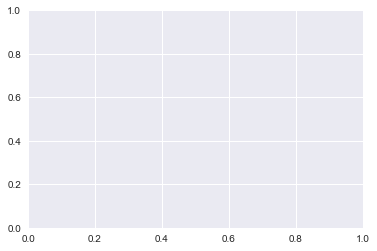

In [202]:
fig, ax1 = plt.subplots()
ax1.plot(list(range(EPOCH)), accuracy_train, color="blue")
ax1.plot(list(range(EPOCH)), accuracy_test, color="skyblue")
ax1.set_xlabel("epoch")
ax1.set_ylabel("accuracy", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(list(range(EPOCH)), losses_train, color="red")
ax2.set_ylabel("train loss", color="red")
ax2.tick_params(axis="y", labelcolor="red")
plt.show()

## LightGBM

In [22]:
lgb_train = lgb.Dataset(db_feature_df.values, db_target_df.values)
lgb_eval = lgb.Dataset(query_featture_df.values, query_target_df.values, reference=lgb_train)

In [27]:
# LightGBM parameters
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_error',
    'num_class': 20,
    'learning_rate': 0.1,
    'num_leaves': 15,
    'min_data_in_leaf': 10,
    'num_iteration': 200,
    'verbose': -1,
}

In [28]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=300,
                valid_sets=lgb_eval,
                early_stopping_rounds=100)
y_pred = gbm.predict(query_featture_df.values, num_iteration = gbm.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)


C:\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's multi_error: 0.689655
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_error: 0.637931
[3]	valid_0's multi_error: 0.603448
[4]	valid_0's multi_error: 0.603448
[5]	valid_0's multi_error: 0.568966
[6]	valid_0's multi_error: 0.568966
[7]	valid_0's multi_error: 0.568966
[8]	valid_0's multi_error: 0.551724
[9]	valid_0's multi_error: 0.551724
[10]	valid_0's multi_error: 0.551724
[11]	valid_0's multi_error: 0.551724
[12]	valid_0's multi_error: 0.551724
[13]	valid_0's multi_error: 0.551724
[14]	valid_0's multi_error: 0.551724
[15]	valid_0's multi_error: 0.551724
[16]	valid_0's multi_error: 0.551724
[17]	valid_0's multi_error: 0.551724
[18]	valid_0's multi_error: 0.551724
[19]	valid_0's multi_error: 0.551724
[20]	valid_0's multi_error: 0.551724
[21]	valid_0's multi_error: 0.551724
[22]	valid_0's multi_error: 0.551724
[23]	valid_0's multi_error: 0.534483
[24]	valid_0's multi_error: 0.534483
[25]	valid_0's multi_error: 0.534483
[26]	valid_0's multi_

In [29]:
accuracy_score(query_target_df, y_pred_max)

0.5

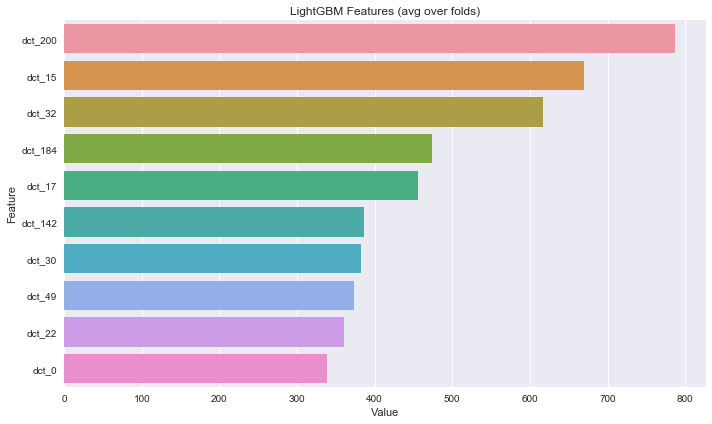

In [30]:
cols_to_fit = db_feature_df.columns.values
feature_importance = pd.DataFrame(sorted(
    zip(gbm.feature_importance(), cols_to_fit)), columns=['Value', 'Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(
    by="Value", ascending=False).head(10))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

# 画像を直接入れる系
こっちのデータは**上のdafatrameと同じ順番**で入ってくると仮定してTargetは同じものを使う  
違う順で入れる場合は注意  

In [92]:
DB_IMG_PATH = "../input/Dlib/cutface/histFlattening/DB/jpeg/"
QUERY_IMG_PATH = "../input/Dlib/cutface/histFlattening/Query/jpeg/"

In [93]:
# 画像読み込み
p = Path(DB_IMG_PATH)
p = sorted(p.glob("*.jpg"))

dbImages = []
dbLabels = np.zeros(len(p), dtype=np.int)

for index, filename in enumerate(tqdm(p)):
    # 相対パスだと参照できなかったので絶対パスでやる
    img = cv2.imread(str(filename.resolve()), 0)
    # C, H, Wの形式にする(今回はグレースケールなのでC = 1)
    img = img.reshape([1, img.shape[0], img.shape[1]])
    dbImages.append((img/225).astype(np.float32))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 332.00it/s]


In [94]:
# 画像読み込み
p = Path(QUERY_IMG_PATH)
p = sorted(p.glob("*.jpg"))

queryImages = []

for index, filename in enumerate(tqdm(p)):
    # 相対パスだと参照できなかったので絶対パスでやる
    img = cv2.imread(str(filename.resolve()), 0)
    # C, H, Wの形式にする(今回はグレースケールなのでC = 1)
    img = img.reshape([1, img.shape[0], img.shape[1]])
    queryImages.append((img/225).astype(np.float32))

100%|█████████████████████████████████████████████████████████████████████████████████| 58/58 [00:00<00:00, 329.44it/s]


In [95]:
dbImages[0].shape

(1, 128, 128)

## ピクセルマッチング

In [96]:
result = []
prediction_df = pd.DataFrame(query_target_df)
for queryIndex in range(len(queryImages)):
    distances = np.zeros(len(dbImages), dtype=np.float32)
    for dbIndex in range(len(dbImages)):
        distances[dbIndex] = (np.abs(dbImages[dbIndex] - queryImages[queryIndex])).sum()
    minimum_id = np.argmin(distances)
    prediction_df.loc[queryIndex, "predict"] = db_target_df[minimum_id]

In [97]:
correct_num = (prediction_df["target"] == prediction_df["predict"]).sum()
accuracy = correct_num / prediction_df.shape[0]

In [98]:
accuracy

0.5344827586206896

# CNN

In [99]:
X_dbToech = torch.Tensor(dbImages)
y_dbTorch = torch.LongTensor(db_target_df)
X_queryTorch = torch.Tensor(queryImages)
y_queryTorch = torch.LongTensor(query_target_df)

dbDataset = TensorDataset(X_dbToech, y_dbTorch)
queryDataset = TensorDataset(X_queryTorch, y_queryTorch)

batch_size = 8
dbLoader = DataLoader(dbDataset, batch_size=batch_size, shuffle=True)
queryLoader = DataLoader(queryDataset, batch_size=batch_size, shuffle=False)

In [100]:
class FlattenLayer(nn.Module):
    def forward(self, x):
        sizes = x.size()
        return x.view(sizes[0], -1)
    
conv_net = nn.Sequential(
    nn.Conv2d(1, 32, 5),
    nn.MaxPool2d(2),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.Dropout2d(0.5),
    nn.Conv2d(32, 64, 5),
    nn.MaxPool2d(2),
    nn.ReLU(),
    nn.BatchNorm2d(64),
    nn.Dropout2d(0.5),
    FlattenLayer()
)

test_input = torch.ones(1, 1, 128, 128)
conv_output_size = conv_net(test_input).size()[-1]

mlp = nn.Sequential(
    nn.Linear(conv_output_size, 200),
    nn.ReLU(),
    nn.BatchNorm1d(200),
    nn.Dropout(0.25),
    nn.Linear(200, 20)
)

net = nn.Sequential(
    conv_net,
    mlp
)

In [101]:
# 評価ヘルパー
def eval_net(net, data_loader, device="cpu"):
    net.eval()
    ys = []
    ypreds = []
    for x, y in data_loader:
        x = x.to(device)
        y = y.to(device)
        with torch.no_grad():
            _, y_pred = net(x).max(1)
        ys.append(y)
        ypreds.append(y_pred)
    # ミニバッチ毎の結果をまとめる
    ys = torch.cat(ys)
    ypreds = torch.cat(ypreds)
    acc = (ys == ypreds).float().sum() / len(ys)
    return acc.item()

# 訓練ヘルパー    
def train_net(net, train_loader, test_loader,
              optimizer_cls=optim.Adam, loss_fn=nn.CrossEntropyLoss(),
              n_iter=10, device="cpu"):
    train_losses = []
    train_acc = []
    val_acc = []
    optimizer = optimizer_cls(net.parameters())
    for epoch in range(n_iter):
        running_loss = 0.0
        net.train()
        n = 0
        n_acc = 0
        for i, (xx, yy) in enumerate(tqdm(train_loader)):
            xx = xx.to(device)
            yy = yy.to(device)
            h = net(xx)
            loss = loss_fn(h, yy)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            n += len(xx)
            _, y_pred = h.max(1)
            n_acc += (yy == y_pred).float().sum().item()
        train_losses.append(running_loss / i)
        train_acc.append(n_acc / n)
        val_acc.append(eval_net(net, test_loader, device))
        print(epoch, train_losses[-1], train_acc[-1], val_acc[-1], flush=True)
    print("max val acc: {}".format(max(val_acc)))

In [102]:
device_name = "cuda:0"

net.to(device_name)
train_net(net, dbLoader, queryLoader, n_iter=20, device=device_name)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 49.44it/s]


0 2.3939883609612784 0.44 0.24137930572032928


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 51.12it/s]


1 1.5765451937913895 0.865 0.5344827771186829


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 49.25it/s]


2 1.0559962193171184 0.975 0.6034482717514038


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 49.62it/s]


3 0.7002826991180578 0.995 0.5862069129943848


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 50.40it/s]


4 0.4428093172609806 1.0 0.6034482717514038


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 50.13it/s]


5 0.29433534294366837 1.0 0.6206896305084229


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 50.85it/s]


6 0.23280414938926697 0.995 0.6206896305084229


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 51.47it/s]


7 0.20531010503570238 1.0 0.6206896305084229


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 51.28it/s]


8 0.14727538699905077 1.0 0.6206896305084229


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 51.32it/s]


9 0.11365972086787224 0.995 0.6034482717514038


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 51.05it/s]


10 0.10678715383013089 1.0 0.6551724076271057


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 51.68it/s]


11 0.08248190581798553 1.0 0.5862069129943848


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 51.20it/s]


12 0.06980381533503532 1.0 0.6206896305084229


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 50.34it/s]


13 0.06947469090421994 1.0 0.6206896305084229


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 50.10it/s]


14 0.06280869866410892 1.0 0.6206896305084229


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 50.34it/s]


15 0.0477218267818292 1.0 0.6206896305084229


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 50.44it/s]


16 0.03993764892220497 1.0 0.5862069129943848


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 49.87it/s]


17 0.03260204320152601 1.0 0.6206896305084229


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 51.37it/s]


18 0.03552483022212982 1.0 0.6206896305084229


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 51.44it/s]


19 0.028965873022874195 1.0 0.6206896305084229
max val acc: 0.6551724076271057


# 転移学習
resnet18は入力が224\*224なのでresizeしてデータセットを作る

In [103]:
# 画像読み込み
p = Path(DB_IMG_PATH)
p = sorted(p.glob("*.jpg"))

dbImages_res = []

for index, filename in enumerate(tqdm(p)):
    # 相対パスだと参照できなかったので絶対パスでやる
    img = cv2.imread(str(filename.resolve()), 0)
    img = cv2.resize(img, (224, 224))
    # C, H, Wの形式にする(今回はグレースケールなのでC = 1)
    # img = img.reshape([1, img.shape[0], img.shape[1]])
    # C=1 なんだけど、resnet18 が3chで作ってあるので、全チャンネル一緒にしてやってみる
    img = np.array([img, img, img])
    
    dbImages_res.append((img/225).astype(np.float32))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 232.74it/s]


In [104]:
# 画像読み込み
p = Path(QUERY_IMG_PATH)
p = sorted(p.glob("*.jpg"))

queryImages_res = []

for index, filename in enumerate(tqdm(p)):
    # 相対パスだと参照できなかったので絶対パスでやる
    img = cv2.imread(str(filename.resolve()), 0)
    img = cv2.resize(img, (224, 224))
    # C, H, Wの形式にする(今回はグレースケールなのでC = 1)
    # img = img.reshape([1, img.shape[0], img.shape[1]])
    # C=1 なんだけど、resnet18 が3chで作ってあるので、全チャンネル一緒にしてやってみる
    img = np.array([img, img, img])
    
    queryImages_res.append((img/225).astype(np.float32))

100%|█████████████████████████████████████████████████████████████████████████████████| 58/58 [00:00<00:00, 217.80it/s]


In [105]:
X_dbToech = torch.Tensor(dbImages_res)
y_dbTorch = torch.LongTensor(db_target_df)
X_queryTorch = torch.Tensor(queryImages_res)
y_queryTorch = torch.LongTensor(query_target_df)

dbDataset = TensorDataset(X_dbToech, y_dbTorch)
queryDataset = TensorDataset(X_queryTorch, y_queryTorch)

batch_size = 8
dbLoader = DataLoader(dbDataset, batch_size=batch_size, shuffle=True)
queryLoader = DataLoader(queryDataset, batch_size=batch_size, shuffle=False)

In [106]:
net = models.resnet18(pretrained=True)

for p in net.parameters():
    p.requires_grad = False
    
fc_input_dim = net.fc.in_features
net.fc = nn.Linear(fc_input_dim, 2)

In [107]:
# 評価ヘルパー
def eval_net(net, data_loader, device="cpu"):
    net.eval()
    ys = []
    ypreds = []
    for x, y in data_loader:
        x = x.to(device)
        y = y.to(device)
        with torch.no_grad():
            _, y_pred = net(x).max(1)
        ys.append(y)
        ypreds.append(y_pred)
    # ミニバッチ毎の結果をまとめる
    ys = torch.cat(ys)
    ypreds = torch.cat(ypreds)
    acc = (ys == ypreds).float().sum() / len(ys)
    return acc.item()

# 訓練ヘルパー    
def train_net(net, train_loader, test_loader, only_fc=True,
              optimizer_cls=optim.Adam, loss_fn=nn.CrossEntropyLoss(),
              n_iter=10, device="cpu"):
    train_losses = []
    train_acc = []
    val_acc = []
    # 最後の層のみoptimizerに渡す
    if only_fc:
        optimizer = optimizer_cls(net.fc.parameters())
    else:
        optimizer = optimizer_cls(net.parameters())
        
    for epoch in range(n_iter):
        running_loss = 0.0
        net.train()
        n = 0
        n_acc = 0
        for i, (xx, yy) in enumerate(tqdm(train_loader)):
            xx = xx.to(device)
            yy = yy.to(device)
            h = net(xx)
            loss = loss_fn(h, yy)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            n += len(xx)
            _, y_pred = h.max(1)
            n_acc += (yy == y_pred).float().sum().item()
        train_losses.append(running_loss / i)
        train_acc.append(n_acc / n)
        val_acc.append(eval_net(net, test_loader, device))
        print(epoch, train_losses[-1], train_acc[-1], val_acc[-1], flush=True)

In [108]:
device_name = "cuda:0"

net.to(device_name)
train_net(net, dbLoader, queryLoader, n_iter=20, device=device_name)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 45.69it/s]


0 0.18611034471541643 0.065 0.051724135875701904


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 49.34it/s]


1 0.15883710437143841 0.09 0.051724135875701904


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 47.91it/s]


2 0.22254245184982815 0.075 0.08620689809322357


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 48.27it/s]


3 0.20777650705228248 0.1 0.17241379618644714


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 47.74it/s]


4 0.16052036064987382 0.1 0.12068965286016464


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 46.45it/s]


5 0.15865001998220882 0.1 0.20689654350280762


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 49.34it/s]


6 0.14530442608520389 0.09 0.051724135875701904


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 48.84it/s]


7 0.16149976834033927 0.095 0.20689654350280762


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 49.44it/s]


8 0.14439855484912792 0.1 0.20689654350280762


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 48.82it/s]


9 0.21620059261719385 0.095 0.18965516984462738


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 49.68it/s]


10 0.1523320347381135 0.095 0.18965516984462738


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 48.77it/s]


11 0.19638939326008162 0.1 0.20689654350280762


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 48.44it/s]


12 0.17136679077520967 0.1 0.12068965286016464


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 50.13it/s]


13 0.15686650729427734 0.095 0.08620689809322357


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 49.53it/s]


14 0.1404130943119526 0.1 0.13793103396892548


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 48.49it/s]


15 0.19844484267135462 0.1 0.18965516984462738


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 48.16it/s]


16 0.2020626204709212 0.1 0.1551724076271057


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 49.10it/s]


17 0.1866901934457322 0.1 0.08620689809322357


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 49.44it/s]


18 0.14273303110773364 0.1 0.1551724076271057


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 49.78it/s]


19 0.1665033766378959 0.1 0.13793103396892548
